<a href="https://colab.research.google.com/github/AlexanderVieira/fashion_mnist/blob/main/fashion_mnist_adam_64batch_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

4423680/4422102 [==============================] - 0s 0us/step


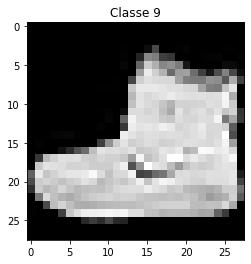

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = fashion_mnist.load_data()
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[0]))

previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

previsores_treinamento = previsores_treinamento.astype('float32') / 255.0
previsores_teste = previsores_teste.astype('float32') / 255.0

In [12]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))
#classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(64, (3,3), activation = 'relu'))
#classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())

classificador.add(Dense(units = 64, activation = 'relu'))
#classificador.add(Dropout(0.2))
#classificador.add(Dense(units = 128, activation = 'relu'))
#classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, activation = 'softmax'))

classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist = classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 100, epochs = 10,
                  validation_data = (previsores_teste, classe_teste))

Epoch 1/10
600/600 [==============================] - 48s 79ms/step - loss: 0.5393 - accuracy: 0.8061 - val_loss: 0.4047 - val_accuracy: 0.8573
Epoch 2/10
600/600 [==============================] - 48s 79ms/step - loss: 0.3531 - accuracy: 0.8734 - val_loss: 0.3732 - val_accuracy: 0.8676
Epoch 3/10
600/600 [==============================] - 47s 78ms/step - loss: 0.3054 - accuracy: 0.8889 - val_loss: 0.3157 - val_accuracy: 0.8865
Epoch 4/10
600/600 [==============================] - 47s 78ms/step - loss: 0.2768 - accuracy: 0.9001 - val_loss: 0.2884 - val_accuracy: 0.8975
Epoch 5/10
600/600 [==============================] - 47s 78ms/step - loss: 0.2519 - accuracy: 0.9083 - val_loss: 0.2729 - val_accuracy: 0.9024
Epoch 6/10
600/600 [==============================] - 47s 78ms/step - loss: 0.2348 - accuracy: 0.9137 - val_loss: 0.2781 - val_accuracy: 0.8999
Epoch 7/10
600/600 [==============================] - 47s 78ms/step - loss: 0.2182 - accuracy: 0.9209 - val_loss: 0.2688 - val_accuracy:

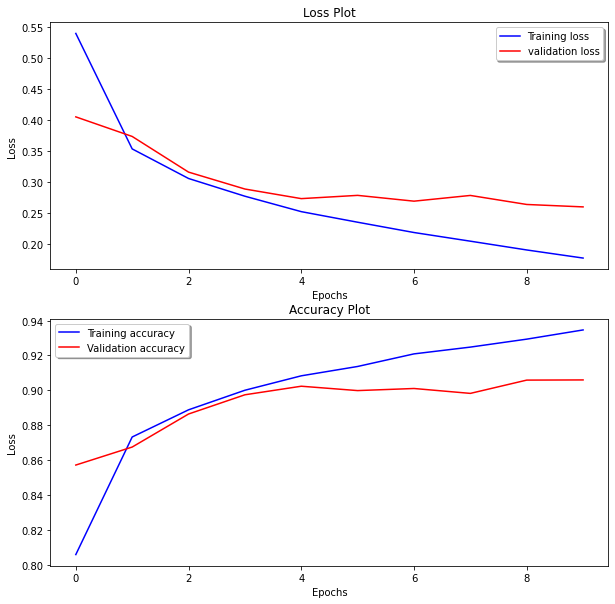

In [13]:
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Loss Plot')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Accuracy Plot')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 3s 9ms/step - loss: 0.2596 - accuracy: 0.9060
